In [8]:
import numpy as np
import math
import pylab
import random
import time
import progressbar
from progressbar import ProgressBar
from scipy import interpolate
from scipy.optimize import curve_fit
from scipy import stats
from random import randint
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib import style
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
style.use('seaborn-white')
import ipywidgets as widgets
from ipywidgets import Layout, Button, Box, FloatText, Textarea, Dropdown, Label, IntSlider

In [22]:
time = 0
if(time == 0):
    service = 5
    servT = 2.0   
    popul = 100
    Type = 'X Intersection'

    if(Type == 'T Intersection'):    
        Number_Of_Directions = 3
    if(Type == 'X Intersection'):  
        Number_Of_Directions = 4

    sq1 = 30
    sq2 = 25
    sq3 = 45
    sq4 = 30

    aMin = 6
    aMax = 12

    bMin = 9
    bMax = 14

    cMin = 8
    cMax = 12

    dMin = 10
    dMax = 18

    Perab = 30
    Perba = 25
    Perbc = 45
    Percb = 30

    if(Number_Of_Directions==4):
        Perad = 15 ##Only counts for X intersection
        Percd = 20 ##Only counts for X intersection

        Perda = 25 ##Only counts for X intersection
        Perdc = 35 ##Only counts for X intersection
    rbci = 16

if(time == 1):
    service = 5
    servT = 2.0   
    popul = 100
    Type = 'X Intersection'

    if(Type == 'T Intersection'):    
        Number_Of_Directions = 3
    if(Type == 'X Intersection'):  
        Number_Of_Directions = 4

    sq1 = 10
    sq2 = 10
    sq3 = 15
    sq4 = 10

    aMin = 10
    aMax = 18

    bMin = 17
    bMax = 25

    cMin = 14
    cMax = 20

    dMin = 25
    dMax = 35

    Perab = 30
    Perba = 25
    Perbc = 45
    Percb = 30

    if(Number_Of_Directions==4):
        Perad = 15 ##Only counts for X intersection
        Percd = 20 ##Only counts for X intersection

        Perda = 25 ##Only counts for X intersection
        Perdc = 35 ##Only counts for X intersection
    rbci = 16

if(time == 2):
    service = 5
    servT = 2.0   
    popul = 100
    Type = 'X Intersection'

    if(Type == 'T Intersection'):    
        Number_Of_Directions = 3
    if(Type == 'X Intersection'):  
        Number_Of_Directions = 4

    sq1 = 7
    sq2 = 6
    sq3 = 6
    sq4 = 8

    aMin = 20
    aMax = 30

    bMin = 30
    bMax = 40

    cMin = 30
    cMax = 35

    dMin = 40
    dMax = 45

    Perab = 30
    Perba = 25
    Perbc = 45
    Percb = 30

    if(Number_Of_Directions==4):
        Perad = 15 ##Only counts for X intersection
        Percd = 20 ##Only counts for X intersection

        Perda = 25 ##Only counts for X intersection
        Perdc = 35 ##Only counts for X intersection
    rbci = 16

In [23]:
def ran(s,e):
    gh = 0
    fg = 0
    for i in range(e-s):
        gh+=distrib[selec[s+i]]
    for i in range(s):
        fg+=distrib[i]
    rang.append(fg)
    rang.append(gh+fg)
    
def turn(a,s,e,ap):
    ran(s,e)
    tp = 0
    servT = 1
    start = rang[len(rang)-2]
    stop = rang[len(rang)-1]
    #print(start, stop)
    while(len(ap)<len(a)):
        for i in range(len(a)):
            pos = a[i]
            #print(pos)
            while(pos-tp<servT):
                pos+=1
            if(pos>=stop):
                start+=tScal
                stop+=tScal
                tp = start
                #print(i)
            if(pos>=start):
                if(len(ap)<len(a)):
                    ap.append(pos)
            tp = pos
            
def arrayFill(mi,ma,A):
    cT=0
    for i in range (popul): #creates an array of traffic with arrival time, for both turning and crossing
        cT += randint(mi,ma)
        A.append(cT)

def turnOff(Per,Fom,To):
    hhh = np.sort(random.sample(Fom,int(len(Fom)*Per/100)))
    for i in range(len(hhh)):
        To.append(hhh[i])

def removTurn(fom,this):
    for i in range(len(this)):
        fom.remove(this[i])

def spacing(of,into):
    if(len(of)>0):
        into.append(of[0])
        for i in range(len(of)-1):
            g = (of[i+1]-of[i])
            if (g>=0):
                into.append(g) 
                
def turnPoint(C,t,p):
    iterate = 0
    pas = 0
    turnP = p
    spac = []
    spacing(C,spac)
    crossing = C
    turning = t
    popul = len(C)
    popi = len(t)
    for i in range(len(spac)):

        if(spac[i]>=service):
            pas = (spac[i]-service)

            if(i<popul):
                while(pas>=servT):
                    if(iterate<popi-1):
                        if(crossing[i]-turning[iterate]>=servT):
                            turnP.append(crossing[i-1])
                            if(iterate<popi-1):
                                iterate+=1 
                            pas = pas-servT
                            if(pas<=1):
                                break
                            if(iterate==popul):
                                break
                    pas=pas-servT
                    if(i<popul):
                        if(iterate<popi):
                            if(crossing[i]-turning[iterate]>=service):
                                if(i>0):
                                    turnP.append(crossing[i-1])
                                if(iterate<popi):
                                    iterate+=1  
    while(len(turnP)<len(t)):
        turnP.append(t[len(turnP)-1])
    for i in range(len(turnP)-1):
        if(turnP[i]==turnP[i+1]):
            turnP[i+1]=turnP[i+1]+servT    
        if(i<len(t)):
            if(turnP[i]<t[i]):
                turnP[i]=t[i]
                
def wait(t,d,a):
    av = 0
    for i in range(len(d)-1):
        av += t[i]-d[i]
    if(len(d)>0):
        av=av/len(d)
    if(av>=0):
        a.append(av)
    if(av<0):
        a.append(-av)
    
def initial(int_Type):
    if(int_Type == 4):
        dom = []
        give = []
        concat_Dom_X(cd,bd,bc,dom)
        concat_give_X(ab,ac,ad,give)
        turnPoint(dom,give,at)

        
        dom = []
        give = []
        concat_Dom_X(da,ca,cd,dom)
        concat_give_X(bc,ba,bd,give)
        turnPoint(dom,give,bt)
        
        dom = []
        give = []
        concat_Dom_X(ab,db,da,dom)
        concat_give_X(ca,cb,cd,give)
        turnPoint(dom,give,ct)
        
        dom = []
        give = []
        concat_Dom_X(bc,ac,ab,dom)
        concat_give_X(da,db,dc,give)
        turnPoint(dom,give,dt)
        
    if(int_Type == 3):
        dom = []
        give = []
        concat_Dom_T(bc,dom)
        concat_give_T(ab,ac,give)
        turnPoint(dom,give,at)
        
        dom = []
        give = []
        concat_Dom_T(ca,dom)
        concat_give_T(bc,ba,give)
        turnPoint(dom,give,bt)
        
        dom = []
        give = []
        concat_Dom_T(ab,dom)
        concat_give_T(ca,cb,give)
        turnPoint(dom,give,ct)
        
def recursive_check(at,bt,ct,dt):
    if(Number_Of_Directions == 4):
        at = []
        turnPoint(bt,allA,at)
        bt = []
        turnPoint(ct,allB,bt)
        ct = []
        turnPoint(dt,allC,ct)
        dt = []
        turnPoint(at,allD,dt)
    if(Number_Of_Directions == 3):
        at = []
        turnPoint(bt,allA,at)
        bt = []
        turnPoint(ct,allB,bt)
        ct = []
        turnPoint(at,allC,ct )   
        
def combine(a,b,c,comb):
    con1 = np.sort(np.concatenate((a,b)))
    ca = (np.sort(np.concatenate((con1,c))))
    for i in range(len(ca)):
        comb.append(ca[i])

def concat_Dom_X(a,b,c,d):
    a2 = []
    b2 = []
    c2 = []
    for i in range(len(a)):
        a2.append(a[i]+(2*rbci))
    for i in range(len(b)):
        b2.append(b[i]+(rbci))
    for i in range(len(c)):
        c2.append(c[i]+(rbci))
        
    con1 = np.sort(np.concatenate((a2,b2)))
    ga = (np.sort(np.concatenate((con1,c2))))
    for i in range(len(ga)):
        d.append(ga[i])
        
def concat_Dom_T(a,d):
    a2 = []
    for i in range(len(a)):
        a2.append(a[i]+(2*rbci))
    for i in range(len(a2)):
        d.append(a2[i])    
    
def concat_give_X(a,b,c,give):
    con1 = np.sort(np.concatenate((a,b)))
    ga = (np.sort(np.concatenate((con1,c))))
    for i in range(len(ga)):
        give.append(ga[i])

def concat_give_T(a,b,give):
    ga = np.sort(np.concatenate((a,b)))
    for i in range(len(ga)):
        give.append(ga[i])
    

In [24]:
Final_Results = [0,0,0,0,0,0,0,0,0,0,0,0]
repeat = 100
pbar = ProgressBar()

for x in pbar(range(repeat)):
    rang = []
    cT = 0
    pas = 0
    label = ['A','B','C','D']
    typeInt = ['RoundAbout','Give Way','Traffic Lights']
    allA = []
    allB = []
    allC = []
    allD = []

    ab = []
    ac = []
    ad = []
    ba = []
    bc = []
    bd = []
    ca = []
    cb = []
    cd = []
    da = []
    db = []
    dc = []

    act = []
    abt = []
    adt = []
    bat = []
    bdt = []
    bct = []
    cat = []
    cdt = []
    cbt = []
    dat = []
    dbt = []
    dct = []

    dom = []
    give = []
    rang = []
    Results = []
    arrayFill(aMin,aMax,allA)
    arrayFill(bMin,bMax,allB)
    arrayFill(cMin,cMax,allC)
    arrayFill(dMin,dMax,allD)
    RBA = allA
    RBB = allB
    RBC = allC
    RBD = allD

    GWA = allA
    GWB = allB
    GWC = allC
    GWD = allD

    TLA = allA
    TLB = allB
    TLC = allC
    TLD = allD

    Intersection_Type=0
    if(Intersection_Type==0):
        at = []
        bt = []
        ct = []
        dt = []
        if(Number_Of_Directions == 4):
            turnOff(Perad,RBA,ad)
            removTurn(RBA,ad)
            turnOff(Perab,RBA,ab)
            removTurn(RBA,ab)
            ac = RBA

            turnOff(Perba,RBC,ba)
            removTurn(RBC,ba)
            turnOff(Perbc,RBC,bc)
            removTurn(RBC,bc)
            bd = RBC

            turnOff(Percb,RBC,cb)
            removTurn(RBC,cb)
            turnOff(Percd,RBC,cd)
            removTurn(RBC,cd)
            ca = RBC

            turnOff(Perda,RBD,da)
            removTurn(RBD,da)
            turnOff(Perdc,RBD,dc)
            removTurn(RBD,dc)
            db = RBD  
        if(Number_Of_Directions == 3):
            turnOff(Perab,RBA,ab)
            removTurn(RBA,ab)
            ac = RBA

            turnOff(Perba,RBC,ba)
            removTurn(RBC,ba)
            bc = RBC

            turnOff(Percb,RBC,cb)
            removTurn(RBC,cb)
            ca = RBC
        initial(Number_Of_Directions)

        for i in range(popul):
            recursive_check(at,bt,ct,dt)   

        RBA = []
        con1 = np.sort(np.concatenate((ab,ac)))
        for i in range(len(con1)):
            RBA.append(con1[i])
        RBB = []
        combine(ba,bd,bc,RBB)
        RBC = []
        combine(ca,cb,cd,RBC)
        RBD = []
        combine(da,db,dc,RBD)
        avg = []
        wait(at,RBA,avg)
        wait(bt,RBB,avg)
        wait(ct,RBC,avg)
        if(Number_Of_Directions == 4):
            wait(dt,RBD,avg)
        for i in range(len(avg)):
            Results.append(avg[i])


    Intersection_Type=1
    ab = []
    ac = []
    ad = []
    ba = []
    bc = []
    bd = []
    ca = []
    cb = []
    cd = []
    da = []
    db = []
    dc = []

    act = []
    abt = []
    adt = []
    bat = []
    bdt = []
    bct = []
    cat = []
    cdt = []
    cbt = []
    dat = []
    dbt = []
    dct = []

    if(Intersection_Type==1):
        if(Number_Of_Directions==4):
            turnOff(Perad,GWA,ad)
            removTurn(GWA,ad)
            turnOff(Perab,GWA,ab)
            removTurn(GWA,ab)
            ac = GWC
            turnOff(Perba,GWB,ba)
            removTurn(GWB,ba)
            turnOff(Perbc,GWB,bc)
            removTurn(GWB,bc)
            bd = GWB
            turnOff(Percd,GWC,cd)
            removTurn(GWC,cd)
            turnOff(Percb,GWC,cb)
            removTurn(GWC,cb)
            ca = GWC
            turnOff(Perda,GWD,da)
            removTurn(GWD,da)
            turnOff(Perdc,GWD,dc)
            removTurn(GWD,dc)
            db = GWD
        if(Number_Of_Directions==3):
            turnOff(Perab,GWC,ab)
            removTurn(GWC,ab)
            ac = GWC
            turnOff(Perbc,GWB,bc)
            removTurn(GWB,bc)
            ba = GWB

            turnOff(Percb,GWC,cb)
            removTurn(GWC,cb)
            ca = GWC 

        abt = []
        act = ac
        adt = ad

        bat = []
        bct = []
        bdt = []

        cat = ca
        cbt = cb
        cdt = []

        dat = []
        dbt = []
        dct = []

        con1 = []
        con2 = []
        con3 = []
        con4 = []
        conT = []
        rSp = []



        if(Number_Of_Directions==4):
            turnPoint(act,dc,dct)

        turnPoint(cat,ba,bat)

        con1 = np.sort(np.concatenate((adt,act)))
        turnPoint(con1,cd,cdt)

        con1 = []
        con1 = np.sort(np.concatenate((cat,cbt)))
        turnPoint(con1,ab,abt)

        if(Number_Of_Directions==4):
            con1 = []
            con1 = np.sort(np.concatenate((act,adt)))
            con2 = np.sort(np.concatenate((cdt,abt)))
            con3 = np.sort(np.concatenate((con1,cat)))
            conT = np.sort(np.concatenate((con3,con2)))
            turnPoint(conT,bd,bdt)

            con1 = []
            con2 = []
            con3 = []
            con4 = []
            conT = []
            con1 = np.sort(np.concatenate((act,abt)))
            con2 = np.sort(np.concatenate((cdt,cat)))
            con3 = np.sort(np.concatenate((con1,cbt)))
            conT = np.sort(np.concatenate((con3,con2)))
            turnPoint(conT,db,dbt)

            con1 = []
            con2 = []
            con3 = []
            con4 = []
            conT = []
            con1 = np.sort(np.concatenate((cat,bdt)))
            con2 = np.sort(np.concatenate((act,cdt)))
            con3 = np.sort(np.concatenate((bat,abt)))
            con4 = np.sort(np.concatenate((con3,con2)))
            conT = np.sort(np.concatenate((con4,con1)))
            turnPoint(conT,da,dat)

        con1 = []
        con2 = []
        con3 = []
        con4 = []
        conT = []
        con1 = np.sort(np.concatenate((dbt,abt)))
        con2 = np.sort(np.concatenate((cat,cdt)))
        con3 = np.sort(np.concatenate((act,dct)))
        con4 = np.sort(np.concatenate((con3,con2)))
        conT = np.sort(np.concatenate((con4,con1)))
        turnPoint(conT,bc,bct)
        avg = []
        if(Number_Of_Directions==4):
            gwa=[]
            wait(ab,abt,gwa)
            wait(ac,act,gwa)
            wait(ad,adt,gwa)
            aver = 0
            for i in range(len(gwa)):
                aver+=gwa[i]
            avg.append(aver/3)
            gwa = []

            wait(ba,bat,gwa)
            wait(bc,bct,gwa)
            wait(bd,bdt,gwa)
            aver = 0
            for i in range(len(gwa)):
                aver+=gwa[i]
            avg.append((aver/3))
            gwa = []

            wait(ca,cat,gwa)
            wait(cb,cbt,gwa)
            wait(cd,cdt,gwa)
            aver = 0
            for i in range(len(gwa)):
                aver+=gwa[i]
            avg.append((aver/3))
            gwa = []

            wait(da,dat,gwa)
            wait(db,dbt,gwa)
            wait(dc,dct,gwa)
            aver = 0
            for i in range(len(gwa)):
                aver+=gwa[i]
            avg.append((aver/3))
            gwa = []

        if(Number_Of_Directions==3):
            gwa=[]
            wait(ab,abt,gwa)
            wait(ac,act,gwa)
            aver = 0
            for i in range(len(gwa)):
                aver+=gwa[i]
            avg.append(aver/2)
            gwa = []

            wait(ba,bat,gwa)
            wait(bc,bct,gwa)
            aver = 0
            for i in range(len(gwa)):
                aver+=gwa[i]
            avg.append((aver/2))
            gwa = []

            wait(ca,cat,gwa)
            wait(cb,cbt,gwa)
            aver = 0
            for i in range(len(gwa)):
                aver+=gwa[i]
            avg.append((aver/2))
            gwa = []
        for i in range(len(avg)):
            Results.append(avg[i])
        avg = []


    Intersection_Type=2
    ab = []
    ac = []
    ad = []
    ba = []
    bc = []
    bd = []
    ca = []
    cb = []
    cd = []
    da = []
    db = []
    dc = []

    act = []
    abt = []
    adt = []
    bat = []
    bdt = []
    bct = []
    cat = []
    cdt = []
    cbt = []
    dat = []
    dbt = []
    dct = []
    if(Intersection_Type==2):
        if(Number_Of_Directions==3):
            turnOff(Perab,TLA,ab)
            removTurn(TLA,ab)
            ac = TLA

            turnOff(Perbc,TLB,bc)
            removTurn(TLB,bc)
            ba = TLB

            turnOff(Percb,TLC,cb)
            removTurn(TLC,cb)
            ca = TLC

            delay = 4
            selec = []
            tScal = sq1 + sq2 + sq3 +(3*delay)
            distrib=[sq1,delay,sq2,delay,sq3,delay]
            for i in range(2*len(distrib)):
                selec.append((i%len(distrib)))

        if(Number_Of_Directions == 4):
            turnOff(Perad,TLA,ad)
            removTurn(TLA,ad)
            turnOff(Perab,TLA,ab)
            removTurn(TLA,ab)
            ac = TLA

            turnOff(Perbc,TLB,bc)
            removTurn(TLB,bc)
            turnOff(Perba,TLB,ba)
            removTurn(TLB,ba)
            bd = TLB

            turnOff(Percb,TLC,cb)
            removTurn(TLC,cb)
            turnOff(Percd,TLC,cd)
            removTurn(TLC,cd)
            ca = TLC

            turnOff(Perda,TLD,da)
            removTurn(TLD,da)
            turnOff(Perdc,TLD,dc)
            removTurn(TLD,dc)
            db = TLD

            delay = 4
            selec = []
            tScal = sq1 + sq2 + sq3 + sq4 +(4*delay)
            distrib=[sq1,delay,sq2,delay,sq3,delay,sq4,delay]
            for i in range(2*len(distrib)):
                selec.append((i%len(distrib)))


        avg = []   
        if(Number_Of_Directions==3):
            turn(ac,0,3,act)
            turn(ba,2,5,bat)
            turn(ca,0,1,cat)
            turn(bc,4,5,bct)
            turn(ab,2,4,abt)
            turn(cb,4,7,cbt)
        if(Number_Of_Directions == 4):
            turn(ac,0,3,act)
            turn(ba,2,5,bat)
            turn(ca,0,1,cat)
            turn(bc,4,5,bct)
            turn(ab,2,4,abt)
            turn(cb,4,7,cbt)

            turn(da,6,7,dat)
            turn(db,0,1,dbt)
            turn(ad,2,7,adt)
            turn(bd,0,1,bdt)
            turn(cd,4,5,cdt)
            turn(dc,0,1,dct)

            allT = []
            TLA = []
            combine(abt,act,adt,allT)
            combine(ab,ac,ad,TLA)
            wait(allT,TLA,avg)

            allT = []
            TLB = []
            combine(bat,bct,bdt,allT)
            combine(ba,bc,bd,TLB)
            wait(allT,TLB,avg)

            allT = []
            TLC = []
            combine(cat,cbt,cdt,allT)
            combine(ca,cb,cd,TLC)
            wait(allT,TLC,avg)

            allT = []
            TLD = []
            combine(dat,dbt,dct,allT)
            combine(da,db,dc,TLD)
            wait(allT,TLD,avg)

        if(Number_Of_Directions==3):
            allT = []
            TLA = []
            ext = []
            combine(abt,act,ext,allT)
            combine(ab,ac,ext,TLA)
            wait(TLA,allT,avg)

            allT = []
            TLB = []
            combine(bat,bct,ext,allT)
            combine(ba,bc,ext,TLB)
            wait(TLB,allT,avg)

            allT = []
            TLC = []
            combine(cat,cbt,ext,allT)
            combine(ca,cb,ext,TLC)
            wait(allT,TLC,avg)
        for i in range(len(avg)):
            Results.append(avg[i])   
        
    for i in range(len(Results)):
        toap = Final_Results[i]+Results[i]
        Final_Results[i] = toap/2
    

100% (100 of 100) |######################| Elapsed Time: 0:00:57 Time:  0:00:57


In [25]:
print(Final_Results)

[49.51297436095974, 46.81395674313062, 4.681272026462212, 13.381867513791445, 9.311051889463112, 76.57790943322621, 55.47529471366969, 56.60310169107772, 212.7516546528721, 399.7201614858651, 161.46591733525617, 229.4941856458011]


In [26]:
yValRB = []
yValGW = []
yValTL = []

xValRB = []
xValGW = []
xValTL = []
xLab = []

ext = Number_Of_Directions
for i in range(int(len(Final_Results)/3)):
    xLab.append(label[i])
    
    xValRB.append(i*3)
    yValRB.append(Final_Results[i])
    
    xValGW.append(i*3+1)
    yValGW.append(Final_Results[i+ext])
    
    xValTL.append(i*3+2)
    yValTL.append(Final_Results[i+(2*ext)])

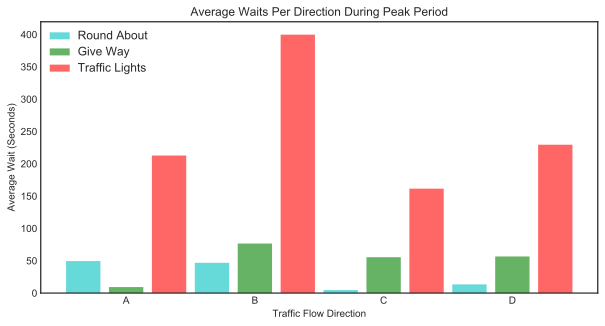

In [27]:

plt.figure(figsize=(10,5))
plt.bar(xValRB,yValRB,color = 'c',alpha = 0.6,label='Round About')
plt.bar(xValGW,yValGW,color = 'g',alpha = 0.6,label='Give Way')
plt.bar(xValTL,yValTL,color = 'r',alpha = 0.6, label='Traffic Lights')

plt.xticks(xValGW, (xLab))

plt.xlabel('Traffic Flow Direction')
plt.ylabel('Average Wait (Seconds)')
legend = plt.legend(loc='upper left', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
for label in legend.get_texts():
    label.set_fontsize('large')

for label in legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width
if(time == 0):
    plt.title('Average Waits Per Direction During Peak Period')
if(time == 1):
    plt.title('Average Waits Per Direction During Mid Period')
if(time == 2):
    plt.title('Average Waits Per Direction During Off Period')
plt.savefig('All Direction Waits_'+ str(time)+'.pdf')
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
plt.bar(xValRB,yValRB,color = 'r')
plt.xticks(xValRB, (xLab))
plt.title('Roundabout')
plt.xlabel('Traffic Flow Direction')
plt.ylabel('Average Wait (Seconds)')
#plt.savefig('Roundabout')
#plt.show()

plt.figure(figsize=(10,10))
plt.bar(xValGW,yValGW,color = 'r')
plt.xticks(xValGW, (xLab))
plt.title('Give Way')
plt.xlabel('Traffic Flow Direction')
plt.ylabel('Average Wait (Seconds)')
#plt.savefig('Give Way')
#plt.show()

plt.figure(figsize=(10,10))
plt.bar(xValTL,yValTL,color = 'r')
plt.xticks(xValTL, (xLab))
plt.title('Traffic Lights')
plt.xlabel('Traffic Flow Direction')
plt.ylabel('Average Wait (Seconds)')
#plt.savefig('Traffic Lights')
#plt.show()